In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#  the dataset
data = pd.read_csv("train.csv")


In [14]:
# Selecting independent variables and target
X = data.iloc[:, 0:20]  # independent columns
y = data.iloc[:, -1]    # target column i.e. price range

# Apply SelectKBest to extract top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

# Create DataFrames for scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns

# Print top 10 features
print(featureScores.nlargest(10, 'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


[0.06148583 0.02029227 0.03336041 0.01963948 0.03255717 0.01596541
 0.03438266 0.03367906 0.03563425 0.0330252  0.03330624 0.04680315
 0.04977132 0.39806852 0.0327686  0.03345162 0.03453888 0.01367159
 0.01786779 0.01973054]


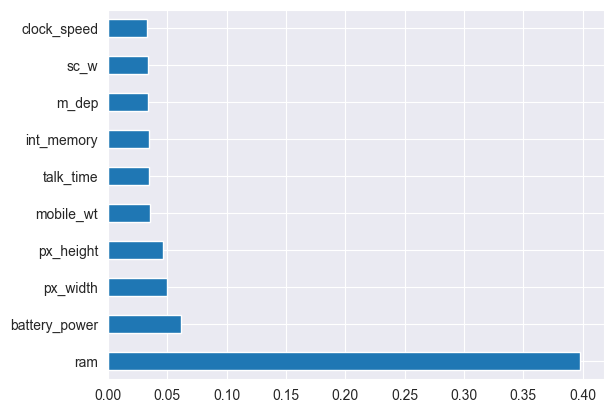

In [15]:
# Selecting independent variables and target
X = data.iloc[:, 0:20]  # independent columns
y = data.iloc[:, -1]    # target column i.e. price range

# Fit the ExtraTreesClassifier model
model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importances
print(model.feature_importances_)  # using inbuilt feature_importances of tree-based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


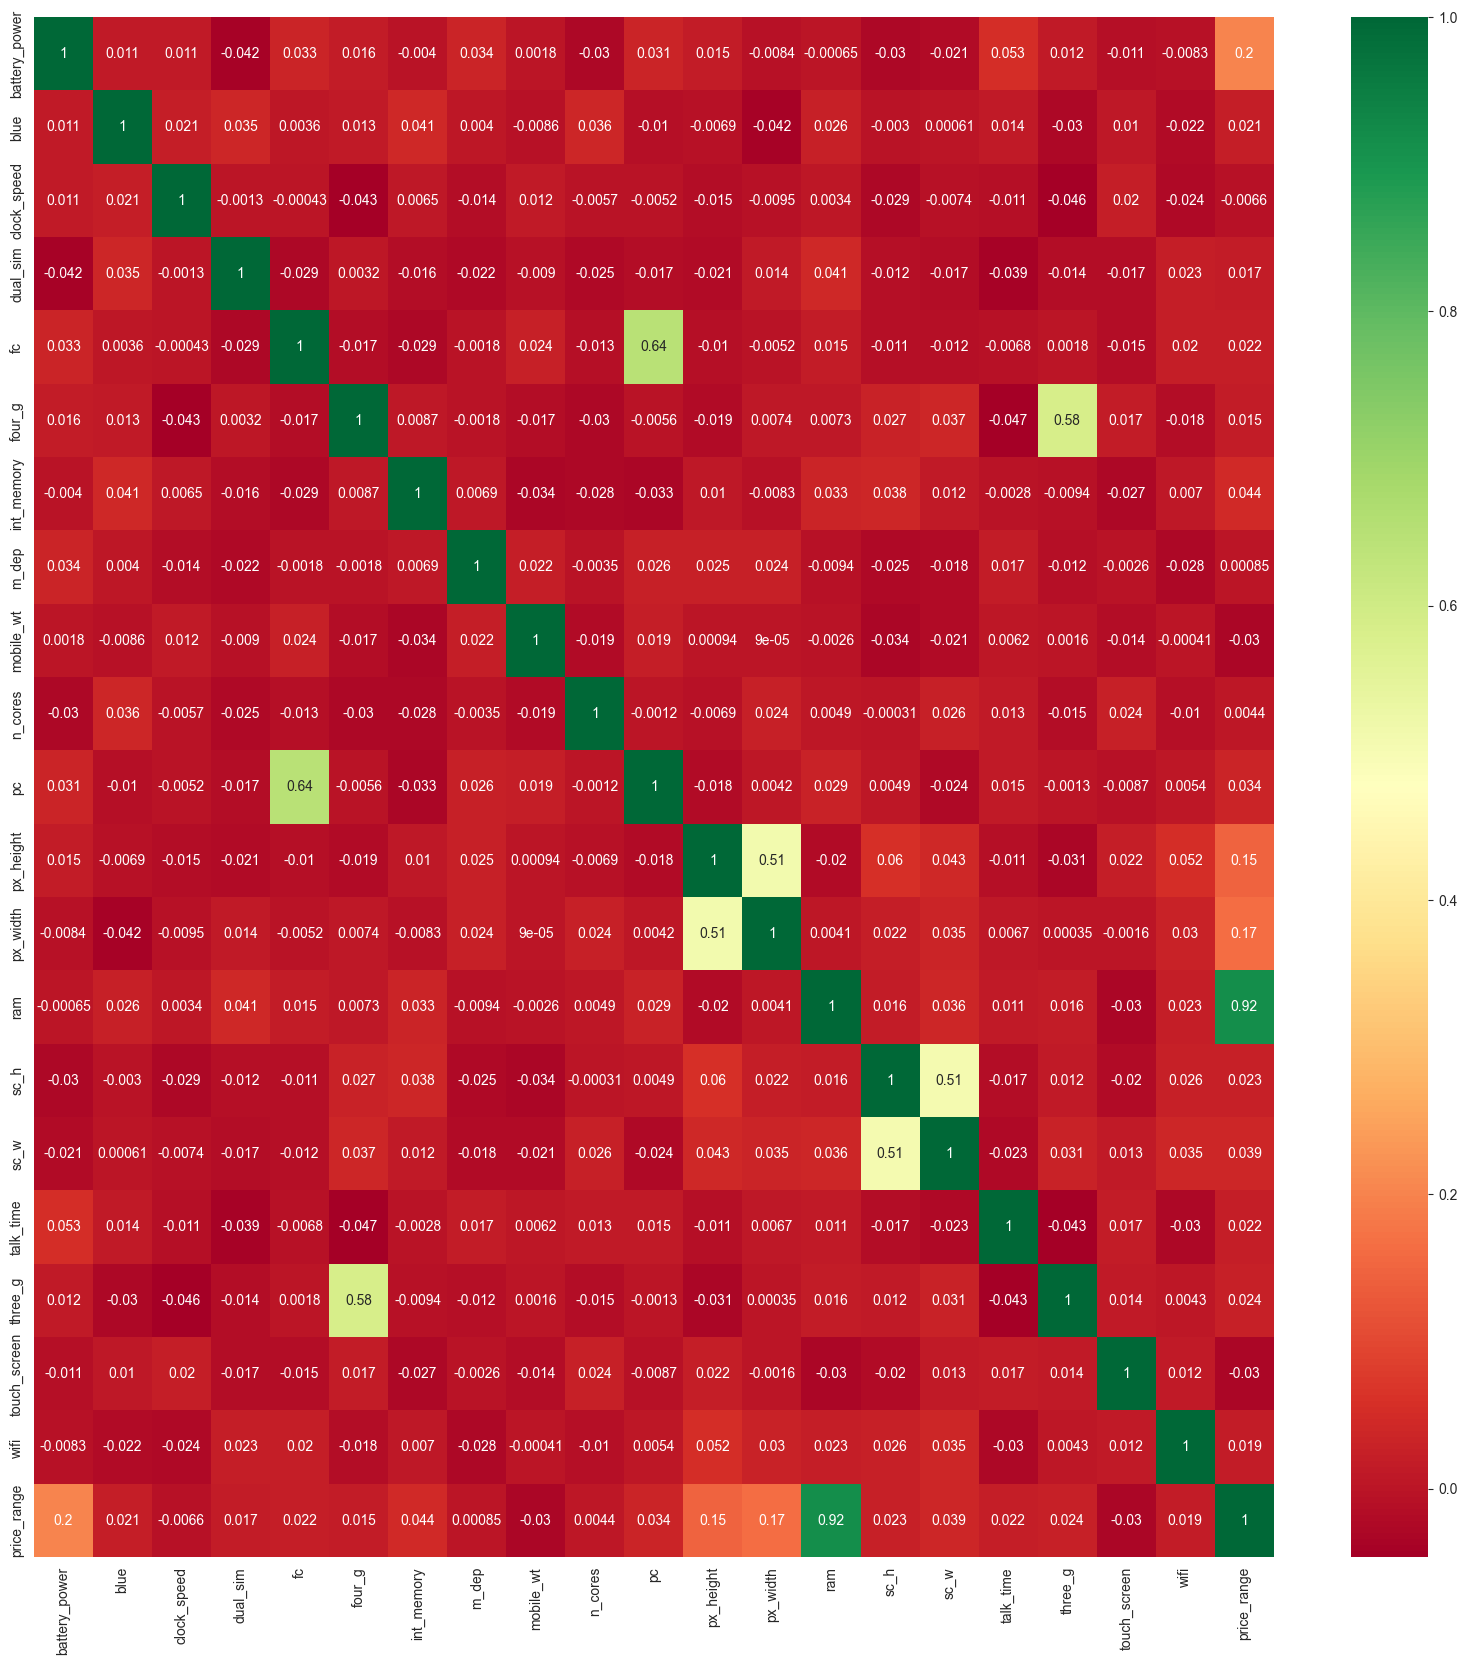

In [16]:
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
data = pd.read_csv("glass.csv")

In [18]:
# Printing the first 10 rows of the dataset
print(data.head(10))

   idno       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  type
0     1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1     2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2     3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3     4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4     5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5     6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6     7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7     8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8     9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9    10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1


In [19]:
# Printing rows with missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]
print(rows_with_missing_values)


Empty DataFrame
Columns: [idno, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, type]
Index: []


In [20]:
# Dropping unnecessary columns and defining target
X = data.drop(columns=['idno', 'type'])
y = data['type']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model training with Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Using KFold cross-validation
kf = KFold(n_splits=8, shuffle=True, random_state=42)

# Defining scorers using make_scorer
accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division=0)

# Scoring dictionary
scoring = {
    'accuracy': accuracy_scorer,
    'f1': f1_scorer,
    'precision': precision_scorer,
    'recall': recall_scorer
}

# Cross-validation
cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)

# Averaging the results and rounding to 4 decimals
average_accuracy = round(cv_results['test_accuracy'].mean(), 4)
average_f1 = round(cv_results['test_f1'].mean(), 4)
average_precision = round(cv_results['test_precision'].mean(), 4)
average_recall = round(cv_results['test_recall'].mean(), 4)

# Output
print("Model Performance with 8-Fold Cross Validation using No Feature Selection Technique")
print("----------------------------------------")
print("Accuracy:  ", average_accuracy)
print("F1-score:  ", average_f1)
print("Precision: ", average_precision)
print("Recall:    ", average_recall)

Model Performance with 8-Fold Cross Validation using No Feature Selection Technique
----------------------------------------
Accuracy:   0.4489
F1-score:   0.4301
Precision:  0.4896
Recall:     0.4489


In [21]:
# Applying SelectKBest to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X, y)

# Creating DataFrames for scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating the feature names and scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Chemical Compo.', 'Score']

# Displaying top 5 features
print("Top 5 Features using Univariate Selection")
print("-----------------------------------------")
print(featureScores.nlargest(5, 'Score'))

# Selecting top 5 features
top_5_features = list(featureScores.nlargest(5, 'Score')['Chemical Compo.'])
univariate_top_features_X = X[top_5_features]

# Splitting the data into training and testing sets
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(univariate_top_features_X, y, test_size=0.2, random_state=10)

# Training the Naive Bayes model
model_u = GaussianNB()
model_u.fit(X_train_u, y_train_u)

# Using KFold
kf_u = KFold(n_splits=8, shuffle=True, random_state=10)

# Cross-validation with scoring
cv_results_u = cross_validate(model_u, univariate_top_features_X, y, cv=kf_u, scoring=scoring)

# Averaging the results and rounding to 4 decimals
# Averaging the results and rounding to 4 decimals
average_accuracy_u = round(cv_results_u['test_accuracy'].mean(), 4)
average_f1_u = round(cv_results_u['test_f1'].mean(), 4)
average_precision_u = round(cv_results_u['test_precision'].mean(), 4)
average_recall_u = round(cv_results_u['test_recall'].mean(), 4)


# Printing performance results
print("\nModel Performance with 8-Fold Cross Validation using Univariate Feature Selection")
print("--------------------------------------------------------")
print("Accuracy:  ", average_accuracy_u)
print("F1-score:  ", average_f1_u)
print("Precision: ", average_precision_u)
print("Recall:    ", average_recall_u)


Top 5 Features using Univariate Selection
-----------------------------------------
  Chemical Compo.       Score
7              Ba  145.514077
2              Mg  100.984212
5               K   31.670632
3              Al   16.977488
1              Na    4.311253

Model Performance with 8-Fold Cross Validation using Univariate Feature Selection
--------------------------------------------------------
Accuracy:   0.4858
F1-score:   0.4403
Precision:  0.4529
Recall:     0.4858


[0.14932664 0.09065608 0.1620872  0.17435481 0.08233197 0.08410124
 0.12910753 0.08694207 0.04109246]


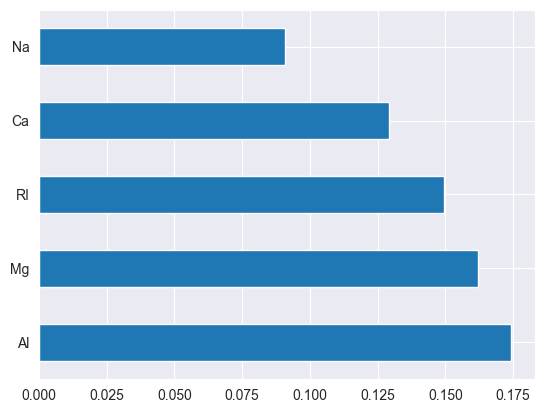


Top 5 Features using Feature Importance
----------------------------------------
Al    0.174355
Mg    0.162087
RI    0.149327
Ca    0.129108
Na    0.090656
dtype: float64

Model Performance with 8-Fold Cross Validation using Feature Importance
-----------------------------------------------------------------------
Accuracy:   0.4993
F1-score:   0.4438
Precision:  0.515
Recall:     0.4993


In [22]:
# Separating features and target variable
X = data.iloc[:, 1:-1]  # Independent columns (excluding 'idno' and 'type')
y = data.iloc[:, -1]    # Target column ('type')

# Instantiate and fit the model
model_fi_etc = RandomForestClassifier()
model_fi_etc.fit(X, y)

# Display feature importances
print(model_fi_etc.feature_importances_)  # Inbuilt feature_importances_ of tree-based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi_etc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Get the top 5 features and print them
top_features = feat_importances.nlargest(5)
print()
print("Top 5 Features using Feature Importance")
print("----------------------------------------")
print(top_features)

# Select the top 5 features
top_5_feature_importance = list(top_features.index)
feature_importance_top_features_X = X[top_5_feature_importance]

# Splitting the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    feature_importance_top_features_X, y, test_size=0.2, random_state=10
)

# Model training with Naive Bayes
model_f = GaussianNB()
model_f.fit(X_train_f, y_train_f)

# Using KFold
kf_f = KFold(n_splits=8, shuffle=True, random_state=10)

# Cross-validation
cv_results_f = cross_validate(model_f, feature_importance_top_features_X, y, cv=kf_f, scoring=scoring)

# Calculating average scores and rounding to 4 decimals
average_accuracy_f = round(cv_results_f['test_accuracy'].mean(), 4)
average_f1_f = round(cv_results_f['test_f1'].mean(), 4)
average_precision_f = round(cv_results_f['test_precision'].mean(), 4)
average_recall_f = round(cv_results_f['test_recall'].mean(), 4)


# Displaying performance
print("\nModel Performance with 8-Fold Cross Validation using Feature Importance")
print("-----------------------------------------------------------------------")
print("Accuracy:  ", average_accuracy_f)
print("F1-score:  ", average_f1_f)
print("Precision: ", average_precision_f)
print("Recall:    ", average_recall_f)



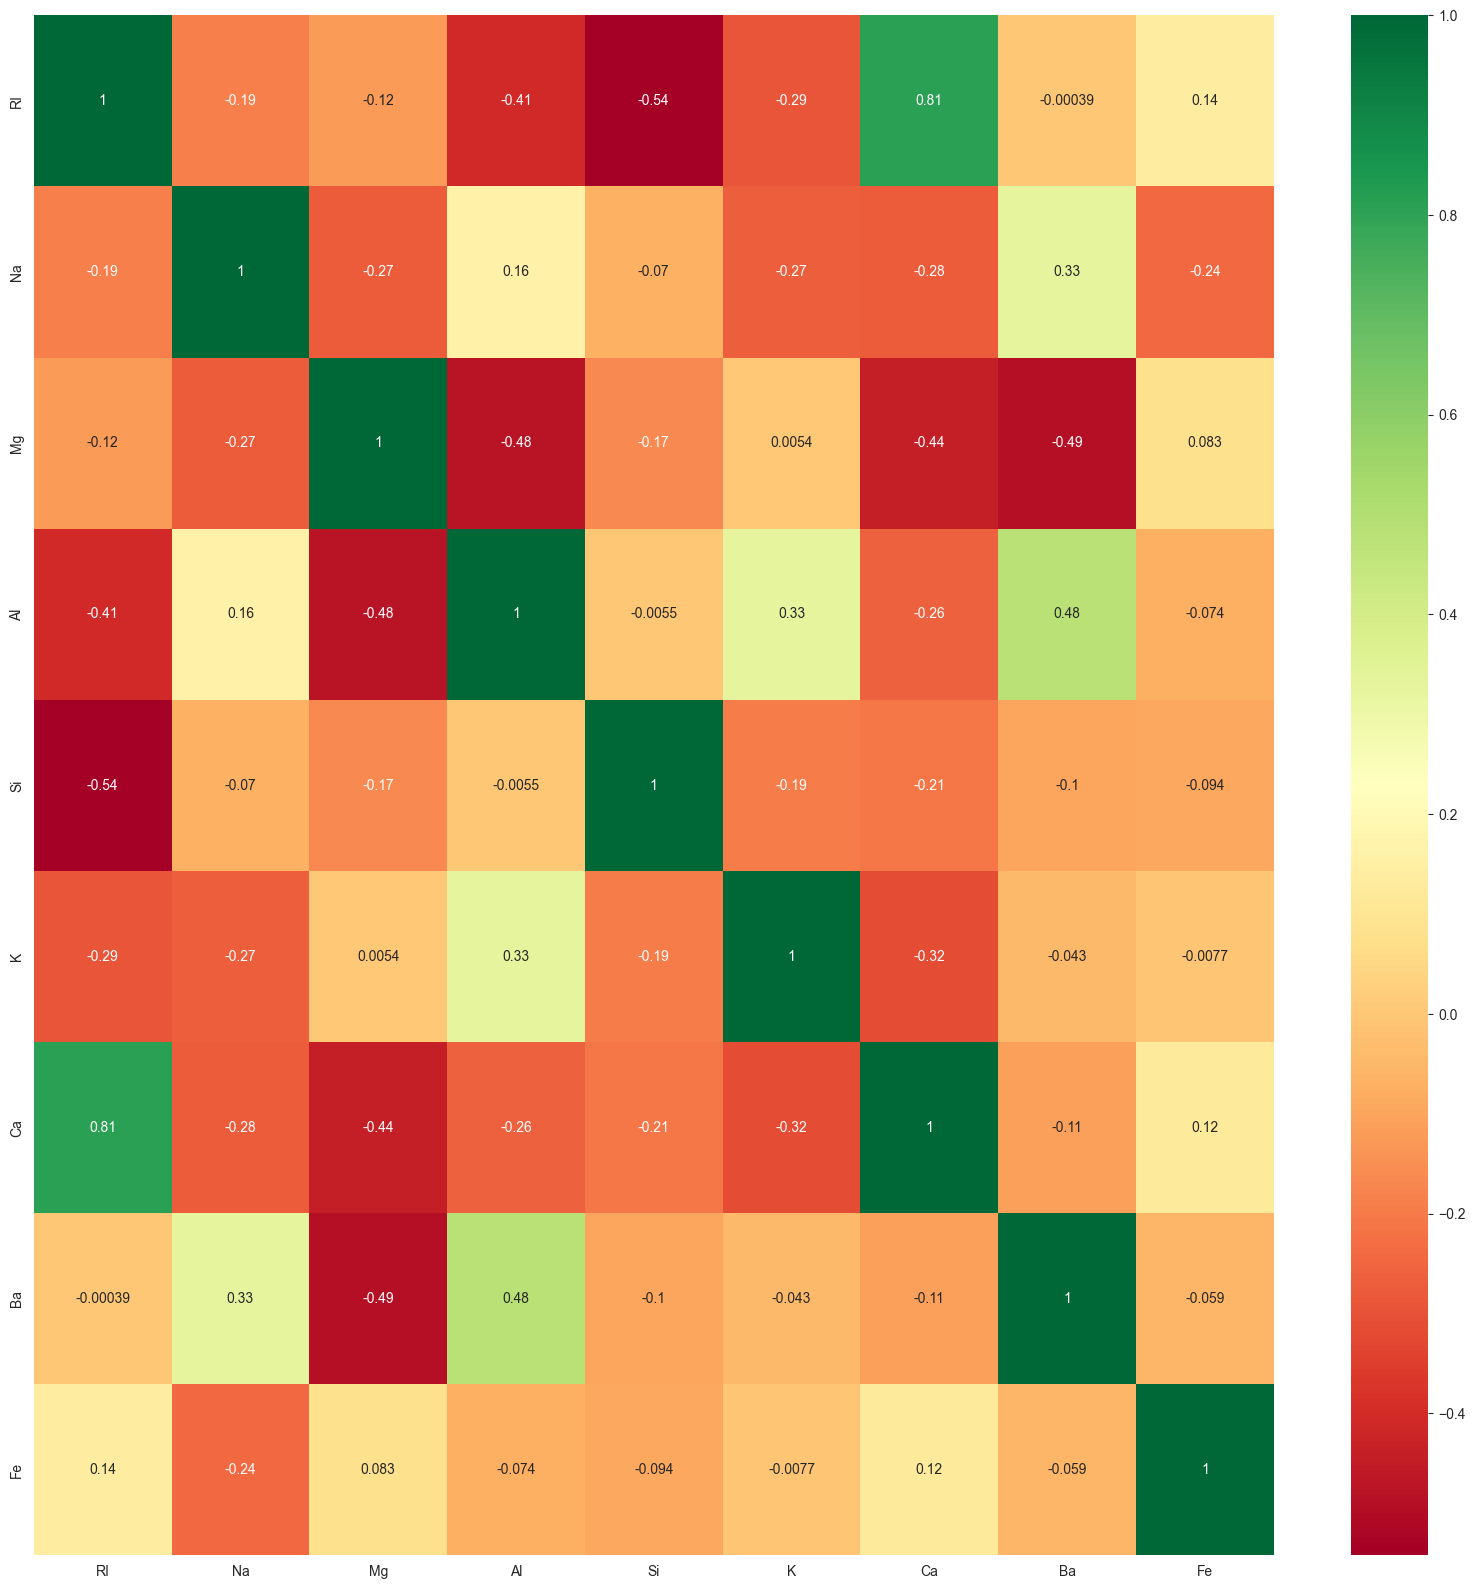


Top 5 Features using Correlation
----------------------------------
Mg: 0.7282
Al: 0.5912
Ba: 0.5777
Na: 0.5064
Fe: 0.1832

Model Performance with 8-Fold Cross Validation using Correlation-Based Feature Selection
----------------------------------------------------
Accuracy:   0.2947
F1-score:   0.3044
Precision:  0.442
Recall:     0.2947


In [23]:
# Exclude the 'idno' column from the features
X = data.iloc[:, 1:-1]  # Independent columns (excluding 'idno' and 'type')
y = data.iloc[:, -1]    # Target column ('type')

# Get correlations of each feature in the dataset
corrmat = X.corr()
top_corr_features = corrmat.index

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(X[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

# Calculate the correlation of each feature with the target variable
y_numeric = pd.factorize(y)[0]  # Convert categorical y to numeric
cor_target = X.apply(lambda x: x.corr(pd.Series(y_numeric)), axis=0)

# Select top 5 features based on correlation with the target
relevant_features = cor_target.abs().sort_values(ascending=False)
top_5_corr_features = list(relevant_features.index[:5])
top_5_corr_values = relevant_features.values[:5]

# Print top 5 features
print()
print("Top 5 Features using Correlation")
print("----------------------------------")
for i in range(len(top_5_corr_features)):
    print(f"{top_5_corr_features[i]}: {top_5_corr_values[i]:.4f}")

# Select the top 5 features
correlation_top_features_X = X[top_5_corr_features]

# Splitting the data into training and testing sets
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    correlation_top_features_X, y, test_size=0.2, random_state=10
)

# Model training with Naive Bayes
model_corr = GaussianNB()
model_corr.fit(X_train_corr, y_train_corr)

# Using KFold
kf_corr = KFold(n_splits=8, shuffle=True, random_state=10)

# Cross-validation
cv_results_corr = cross_validate(model_corr, correlation_top_features_X, y, cv=kf_corr, scoring=scoring)

# Calculate average results
average_accuracy_corr = round(cv_results_corr['test_accuracy'].mean(), 4)
average_f1_corr = round(cv_results_corr['test_f1'].mean(), 4)
average_precision_corr = round(cv_results_corr['test_precision'].mean(), 4)
average_recall_corr = round(cv_results_corr['test_recall'].mean(), 4)

# Print performance metrics
print("\nModel Performance with 8-Fold Cross Validation using Correlation-Based Feature Selection")
print("----------------------------------------------------")
print("Accuracy:  ", average_accuracy_corr)
print("F1-score:  ", average_f1_corr)
print("Precision: ", average_precision_corr)
print("Recall:    ", average_recall_corr)
